In [1]:
# !pip install catboost

In [2]:
#import basic modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
import time
import seaborn as sns

warnings.filterwarnings("ignore") 
pd.set_option('max_rows', 500) 

# Exploratory Data Analysis
## 1. Getting the data

In [3]:
winter_data = pd.read_csv(
    'P:/Betty/Clothing_Jayson/IndividualClothingValue.csv', index_col=0)


In [4]:
winter_data.shape

(2038, 34)

In [5]:
winter_data.head()

,DAY,School,SchoolType,StartTime,AvgMaxDailyTemp,AvgMinDailyTemp,AvgIndoorRelativeHumidity,IndoorTempDuringSurvey,Grade,Age,...,Shoes,FullSweater,Underwear,SwC,TSV,TPV,TA,TCV,TSL,MC
SNo,,,,,,,,,,,,,,,,,,,,,
1,1,1,0,3,22.2,5.1,55.1,14.5,3,8,...,0.02,0.36,0.03,1,-1,2,1,2,1,2
2,1,1,0,3,22.2,5.1,55.1,14.5,3,8,...,0.02,0.00,0.03,1,-1,2,1,3,1,2
3,1,1,0,3,22.2,5.1,55.1,14.5,3,8,...,0.02,0.00,0.03,2,0,1,1,2,3,4
4,1,1,0,3,22.2,5.1,55.1,14.5,3,10,...,0.02,0.00,0.03,2,0,0,1,2,2,4
5,1,1,0,3,22.2,5.1,55.1,14.5,3,9,...,0.02,0.00,0.03,2,0,1,1,2,2,2


In [6]:
winter_data.describe()

,DAY,School,SchoolType,StartTime,AvgMaxDailyTemp,AvgMinDailyTemp,AvgIndoorRelativeHumidity,IndoorTempDuringSurvey,Grade,Age,...,Shoes,FullSweater,Underwear,SwC,TSV,TPV,TA,TCV,TSL,MC
count,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,...,2038.00,2037.000000,2.038000e+03,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000
mean,2.732581,2.709519,0.733562,2.299313,21.217076,6.254809,61.204711,14.496075,3.947007,9.524043,...,0.02,0.167364,3.000000e-02,1.965653,-0.326300,0.693817,0.958783,2.119235,1.996075,3.572620
std,1.309543,1.285857,0.442204,1.252473,1.744861,1.715494,7.081575,1.203274,0.797110,1.049188,...,0.00,0.179600,1.041090e-17,0.301848,0.612427,0.691821,0.198840,0.766258,0.822478,1.014077
min,1.000000,1.000000,0.000000,1.000000,17.600000,4.200000,44.230000,12.800000,3.000000,6.000000,...,0.02,0.000000,3.000000e-02,1.000000,-2.000000,-1.000000,0.000000,-3.000000,-2.000000,1.000000
25%,2.000000,1.000000,0.000000,1.000000,20.500000,5.000000,58.200000,13.600000,3.000000,9.000000,...,0.02,0.000000,3.000000e-02,2.000000,-1.000000,0.000000,1.000000,2.000000,2.000000,4.000000
50%,3.000000,3.000000,1.000000,2.000000,21.200000,5.600000,60.600000,14.100000,4.000000,10.000000,...,0.02,0.000000,3.000000e-02,2.000000,0.000000,1.000000,1.000000,2.000000,2.000000,4.000000
75%,4.000000,4.000000,1.000000,3.000000,22.400000,6.600000,65.400000,15.100000,5.000000,10.000000,...,0.02,0.360000,3.000000e-02,2.000000,0.000000,1.000000,1.000000,3.000000,2.000000,4.000000
max,5.000000,5.000000,1.000000,6.000000,24.200000,10.100000,75.600000,17.500000,5.000000,13.000000,...,0.02,0.360000,3.000000e-02,3.000000,2.000000,2.000000,1.000000,3.000000,3.000000,4.000000


In [7]:
winter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2038 entries, 1 to 2038
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DAY                        2038 non-null   int64  
 1   School                     2038 non-null   int64  
 2   SchoolType                 2038 non-null   int64  
 3   StartTime                  2038 non-null   int64  
 4   AvgMaxDailyTemp            2038 non-null   float64
 5   AvgMinDailyTemp            2038 non-null   float64
 6   AvgIndoorRelativeHumidity  2038 non-null   float64
 7   IndoorTempDuringSurvey     2038 non-null   float64
 8   Grade                      2038 non-null   int64  
 9   Age                        2038 non-null   int64  
 10  Gender                     2038 non-null   int64  
 11  FormalClothing             2038 non-null   int64  
 12  Pant                       2038 non-null   float64
 13  Trackpant                  2038 non-null   float

In [8]:
winter_data.columns

Index(['DAY', 'School', 'SchoolType', 'StartTime', 'AvgMaxDailyTemp',
       'AvgMinDailyTemp', 'AvgIndoorRelativeHumidity',
       'IndoorTempDuringSurvey', 'Grade', 'Age', 'Gender', 'FormalClothing',
       'Pant', 'Trackpant', 'Halfshirt', 'Blazer', 'Jacket', 'Skirt',
       'FullShirt', 'HalfSweater', 'Tshirt', 'Socks', 'Thermal', 'Vest',
       'Shoes', 'FullSweater', 'Underwear', 'SwC', 'TSV', 'TPV', 'TA', 'TCV',
       'TSL', 'MC'],
      dtype='object')

In [9]:
winter_data = winter_data.astype({
    'DAY':'category',
    'School':'category',
    'SchoolType': 'category',
    'StartTime': 'category',
    'Grade': 'category',
    'Gender': 'category',
    'FormalClothing': 'bool',
    'Pant': 'bool',
    'Trackpant': 'bool',
    'Halfshirt': 'bool',
    'Blazer': 'bool',
    'Jacket': 'bool',
    'Skirt': 'bool',
    'FullShirt': 'bool',
    'HalfSweater': 'bool',
    'Tshirt': 'bool',
    'Socks': 'bool',
    'Thermal': 'bool',
    'Vest': 'bool',
    'FullSweater': 'bool',
    'TSV':'category',
    'TPV':'category',
    'TCV':'category',
    'TSL':'category',
    'MC':'category',
    'SwC':'category',
})

In [10]:
winter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2038 entries, 1 to 2038
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   DAY                        2038 non-null   category
 1   School                     2038 non-null   category
 2   SchoolType                 2038 non-null   category
 3   StartTime                  2038 non-null   category
 4   AvgMaxDailyTemp            2038 non-null   float64 
 5   AvgMinDailyTemp            2038 non-null   float64 
 6   AvgIndoorRelativeHumidity  2038 non-null   float64 
 7   IndoorTempDuringSurvey     2038 non-null   float64 
 8   Grade                      2038 non-null   category
 9   Age                        2038 non-null   int64   
 10  Gender                     2038 non-null   category
 11  FormalClothing             2038 non-null   bool    
 12  Pant                       2038 non-null   bool    
 13  Trackpant                  2038 n

## Distributions of Numerical Features

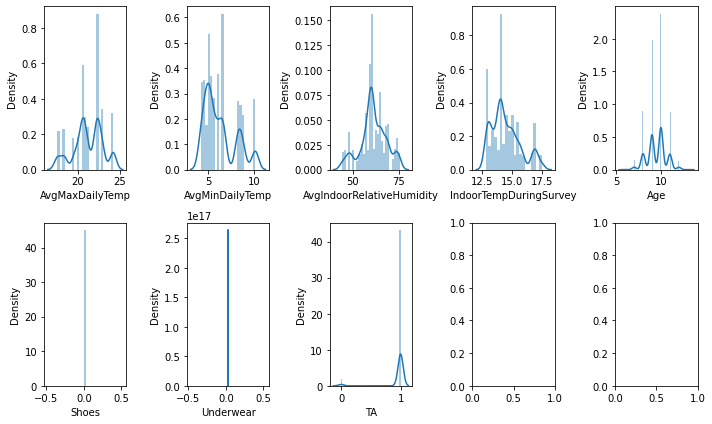

In [11]:
# create a new dataframe with columns containing only the numerical features
num_features = winter_data.select_dtypes(exclude=['bool', 'category']).copy()

# we plot individual column distributions with null entry rows dropped
fig, axs = plt.subplots(2, 5, figsize=(10, 6))
for i in range(len(num_features.columns)):
    plt.subplot(2, 5, i+1)
    sns.distplot(num_features.iloc[:,i].dropna())
    plt.xlabel(num_features.columns[i])

plt.tight_layout()
plt.show()

## Distributions of Categorical Features

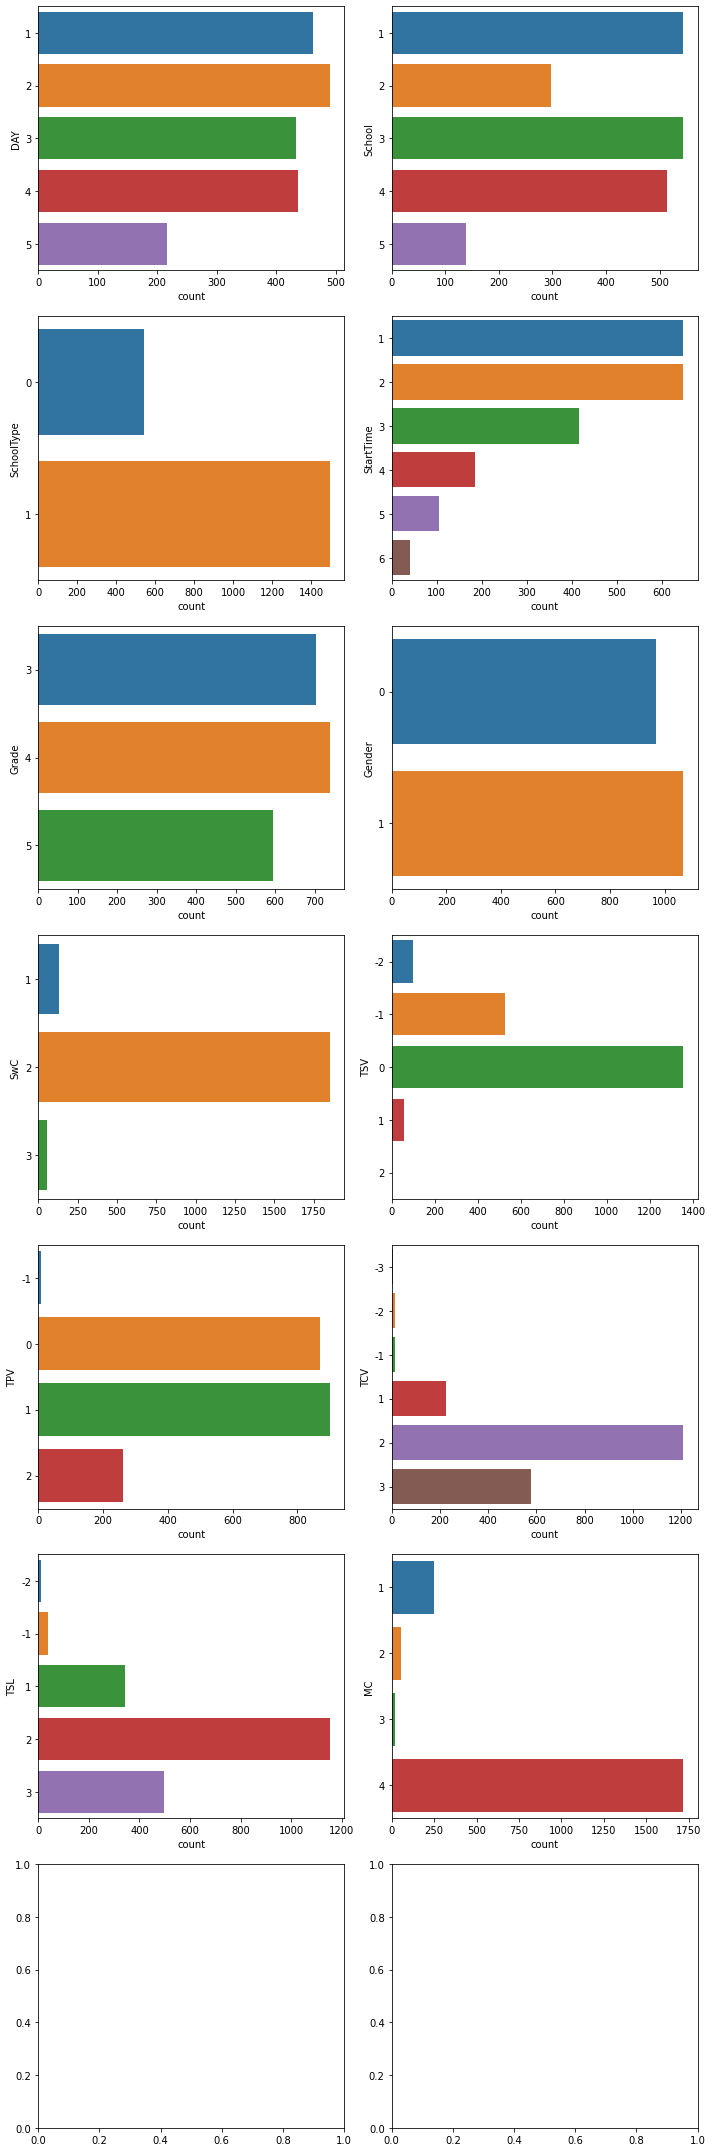

In [12]:
# create a new dataframe with columns containing only the categorical features
cat_features = winter_data.select_dtypes(include=['category']).copy()

# we plot individual column distributions with null entry rows dropped
fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(10, 30))
plt.subplots_adjust(right=1.5, top=1.25)

for i in range(len(cat_features.columns)):
    plt.subplot(7, 2, i+1)
    sns.countplot(y=cat_features.columns[i], data=cat_features)
    
plt.tight_layout()
plt.show()

## Distributions of Boolean Features

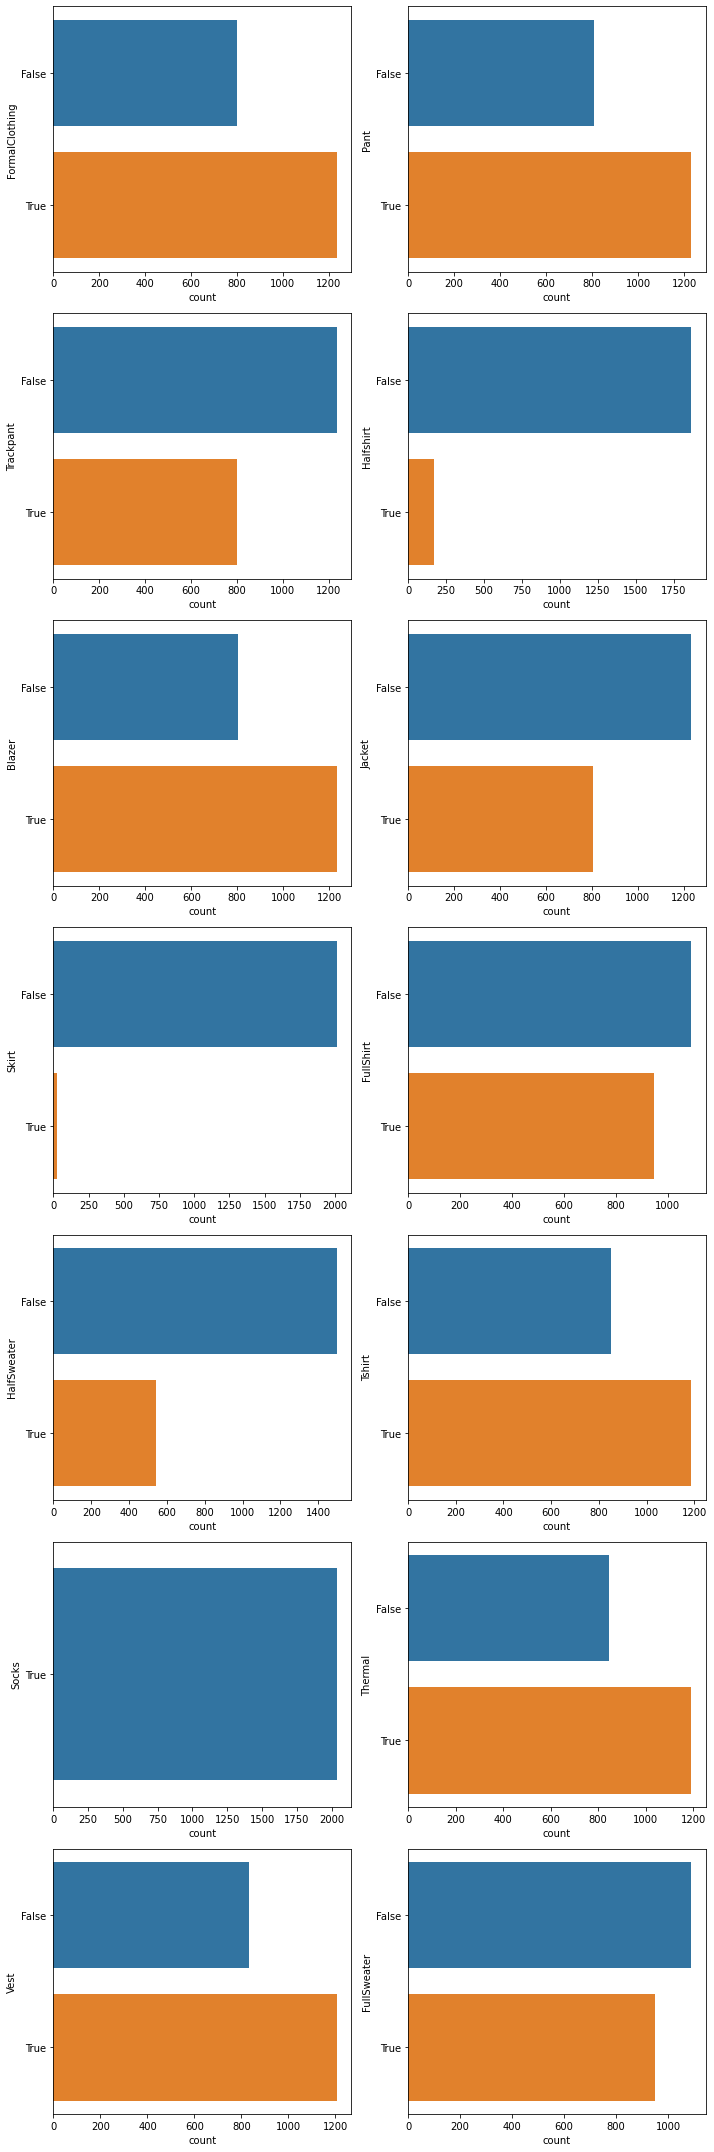

In [13]:
# create a new dataframe with columns containing only the categorical features
bool_features = winter_data.select_dtypes(include='bool').copy()

# we plot individual column distributions with null entry rows dropped
fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(10, 30))
plt.subplots_adjust(right=1.5, top=1.25)

for i in range(len(bool_features.columns)):
    plt.subplot(7, 2, i+1)
    sns.countplot(y=bool_features.columns[i], data=bool_features)
    
plt.tight_layout()
plt.show()

In [14]:
tsl_target_data = winter_data.copy()

## Machine Learning Models (CatBoost)

In [15]:
import catboost as cat
# Classification metrics 
from sklearn.metrics import precision_score, cohen_kappa_score, f1_score, accuracy_score, recall_score
# Helper for cross-validation
from sklearn.model_selection import StratifiedKFold

In [16]:
def oof_trainer(X: pd.DataFrame,
                y,
            n_folds = None,
            params: dict = None,
            del_cols: list = None,
            cat_features=None):
    
    """This function trains multiple Catboost model while performing stratified CV with shuffling.
    out-of-fold (oof) predictions are evaluated at each fold and printed out 
    at the end of the routine as a list. The mean scores on all fold is also printed out.
    
    The metrics used for evaluation are precision_auc and the cohen's kappa
    
    Output: 
    models -- a list of models trained on each fold during CV
    oof_pred -- prediction array consisting of predictions coming from different models
    """
        
    # collect models and scores from each fold
    models = []
    f1_scores = []
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    scores = []
    # CV splitter
    folds = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=505) #GroupKFold(n_splits=n_folds) 
    #features to use
    columns = [col for col in X.columns.values if not col in del_cols]
    # dimension of the target 
    n_target=1
    
    # collect out-of-sample predictions
    data_X, data_y, oof_pred = pd.DataFrame(), pd.Series(), np.zeros((len(X),n_target))


    for fold_n, (train_index, valid_index) in enumerate(folds.split(X, y)):
     
        print('Fold {} started at {}'.format(fold_n + 1,time.ctime()))
        #print((train_index, valid_index))
        X_train, X_valid = X.iloc[train_index][columns], X.iloc[valid_index][columns]
        y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
        data_X = data_X.append(X_valid)
        data_y = data_y.append(y_valid)
        print(data_X.shape)
        
        #Eval set preparation
        eval_set = [(X_train, y_train)]
       # eval_names = ['train']
        eval_set.append((X_valid, y_valid))
       # eval_names.append('valid')
    
        model = cat.CatBoostClassifier()
        model.fit(X=X_train, y=y_train, 
                       eval_set=eval_set, 
                       verbose=500, early_stopping_rounds=150,
                      cat_features=cat_features, use_best_model=True, plot=True)
        
        oof_pred[valid_index] = model.predict(X_valid).reshape(-1, n_target)
        models.append(model)
    
        print('-'*30)
        
        scores.append(cohen_kappa_score(y_valid, oof_pred[valid_index], weights='quadratic'))
        f1_scores.append(f1_score(y_valid, oof_pred[valid_index],   average=None))
        accuracy_scores.append(accuracy_score(y_valid, oof_pred[valid_index]))
        precision_scores.append(precision_score(y_valid, oof_pred[valid_index],   average=None))
        recall_scores.append(recall_score(y_valid, oof_pred[valid_index],   average=None))

    print(f'catb fold kappa scores: {scores}')
    print(f'catb fold kappa scores mean: {np.mean(scores)}')
    print(f'catb fold f1 scores: {f1_scores}')
    print(f'catb fold f1 scores mean: {np.mean(f1_scores)}')
    print(f'catb fold precision-micro scores: {precision_scores}')
    print(f'catb fold precision-micro scores mean: {np.mean(precision_scores)}')
    print(f'catb fold recall-micro scores: {recall_scores}')
    print(f'catb fold recall-micro scores mean: {np.mean(recall_scores)}')
    print(f'catb fold accuracy scores: {accuracy_scores}')
    print(f'catb fold accuracy scores mean: {np.mean(accuracy_scores)}')
   
    return models, oof_pred


In [17]:
tsl_target_data.columns

Index(['DAY', 'School', 'SchoolType', 'StartTime', 'AvgMaxDailyTemp',
       'AvgMinDailyTemp', 'AvgIndoorRelativeHumidity',
       'IndoorTempDuringSurvey', 'Grade', 'Age', 'Gender', 'FormalClothing',
       'Pant', 'Trackpant', 'Halfshirt', 'Blazer', 'Jacket', 'Skirt',
       'FullShirt', 'HalfSweater', 'Tshirt', 'Socks', 'Thermal', 'Vest',
       'Shoes', 'FullSweater', 'Underwear', 'SwC', 'TSV', 'TPV', 'TA', 'TCV',
       'TSL', 'MC'],
      dtype='object')

# Target: TSL

In [18]:
# feature selection for Catboost
models, oof_pred = oof_trainer(X=tsl_target_data,
                    y=tsl_target_data.TSL,
                    n_folds = 5,
                   # params=params,
                    del_cols=['TSV',
       'TPV','TCV', 'TSL'],
                    cat_features=cat_features.drop(columns=['TSV',
       'TPV','TCV', 'TSL']).columns.values.tolist())

Fold 1 started at Tue Aug 23 01:27:26 2022
(408, 30)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109036
0:	learn: 1.5052314	test: 1.5052314	test1: 1.5055811	best: 1.5055811 (0)	total: 175ms	remaining: 2m 54s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.9855059234
bestIteration = 131

Shrink model to first 132 iterations.
------------------------------
Fold 2 started at Tue Aug 23 01:27:41 2022
(816, 30)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109036
0:	learn: 1.5054537	test: 1.5054537	test1: 1.5063457	best: 1.5063457 (0)	total: 113ms	remaining: 1m 53s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.9606132682
bestIteration = 155

Shrink model to first 156 iterations.
------------------------------
Fold 3 started at Tue Aug 23 01:27:59 2022
(1224, 30)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109036
0:	learn: 1.5062203	test: 1.5062203	test1: 1.5123039	best: 1.5123039 (0)	total: 42.7ms	remaining: 42.6s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.9889006918
bestIteration = 128

Shrink model to first 129 iterations.
------------------------------
Fold 4 started at Tue Aug 23 01:28:12 2022
(1631, 30)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109038
0:	learn: 1.5101131	test: 1.5101131	test1: 1.5168090	best: 1.5168090 (0)	total: 37.9ms	remaining: 37.8s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.9800428481
bestIteration = 214

Shrink model to first 215 iterations.
------------------------------
Fold 5 started at Tue Aug 23 01:28:31 2022
(2038, 30)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109038
0:	learn: 1.5131175	test: 1.5128736	test1: 1.5156214	best: 1.5156214 (0)	total: 49.3ms	remaining: 49.3s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.9910530584
bestIteration = 154

Shrink model to first 155 iterations.
------------------------------
catb fold kappa scores: [0.19721026280415344, 0.1507936507936508, 0.17868305345128999, 0.21942289251155078, 0.15133391111835737]
catb fold kappa scores mean: 0.17948875413580048
catb fold f1 scores: [array([0.        , 0.        , 0.1025641 , 0.73234811, 0.21848739]), array([0.        , 0.        , 0.25882353, 0.71523179, 0.11965812]), array([0.        , 0.        , 0.21276596, 0.70588235, 0.19402985]), array([0.        , 0.25      , 0.19354839, 0.71034483, 0.24615385]), array([0.        , 0.        , 0.30434783, 0.6958042 , 0.18571429])]
catb fold f1 scores mean: 0.23382818303625663
catb fold precision-micro scores: [array([0.        , 0.        , 0.44444444, 0.5883905 , 0.65      ]), a

## Feature importance

In [19]:
best_gb_model = models[1]
best_gb_model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,School,8.995579
1,AvgIndoorRelativeHumidity,8.176524
2,DAY,7.908865
3,Grade,7.490787
4,Age,6.920642
5,IndoorTempDuringSurvey,6.600062
6,TA,5.851666
7,Vest,5.679902
8,StartTime,5.571977
9,AvgMinDailyTemp,4.989981


# Target: TPV

In [20]:
# feature selection for Catboost
# Remove all rows with TPV value -1
models, oof_pred = oof_trainer(X=tsl_target_data[tsl_target_data.TPV != -1],
                    y=tsl_target_data[tsl_target_data.TPV != -1].TPV,
                    n_folds = 5,
                   # params=params,
                    del_cols=['TSV',
       'TSL','TCV', 'TSL', 'TPV'],
                    cat_features=cat_features.drop(columns=['TSV', 'TPV',
       'TSL','TCV', 'TSL']).columns.values.tolist())

Fold 1 started at Tue Aug 23 01:28:45 2022
(406, 30)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109027
0:	learn: 1.0717463	test: 1.0717463	test1: 1.0761554	best: 1.0761554 (0)	total: 27.8ms	remaining: 27.8s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.9194651707
bestIteration = 175

Shrink model to first 176 iterations.
------------------------------
Fold 2 started at Tue Aug 23 01:28:58 2022
(812, 30)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109027
0:	learn: 1.0732017	test: 1.0731809	test1: 1.0755733	best: 1.0755733 (0)	total: 30.4ms	remaining: 30.3s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.9210748243
bestIteration = 99

Shrink model to first 100 iterations.
------------------------------
Fold 3 started at Tue Aug 23 01:29:10 2022
(1218, 30)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109027
0:	learn: 1.0744489	test: 1.0743419	test1: 1.0770045	best: 1.0770045 (0)	total: 52.6ms	remaining: 52.5s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.9148383262
bestIteration = 145

Shrink model to first 146 iterations.
------------------------------
Fold 4 started at Tue Aug 23 01:29:24 2022
(1624, 30)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109027
0:	learn: 1.0725793	test: 1.0726985	test1: 1.0734870	best: 1.0734870 (0)	total: 28.6ms	remaining: 28.5s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.9100770866
bestIteration = 159

Shrink model to first 160 iterations.
------------------------------
Fold 5 started at Tue Aug 23 01:29:36 2022
(2029, 30)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109028
0:	learn: 1.0750545	test: 1.0750545	test1: 1.0764391	best: 1.0764391 (0)	total: 39.2ms	remaining: 39.2s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.8927345289
bestIteration = 130

Shrink model to first 131 iterations.
------------------------------
catb fold kappa scores: [0.18298390116061403, 0.27285808318153304, 0.2960990712074303, 0.1490508413677466, 0.3287362792006755]
catb fold kappa scores mean: 0.24594563522359988
catb fold f1 scores: [array([0.52631579, 0.56930693, 0.18181818]), array([0.5974026 , 0.51630435, 0.13559322]), array([0.57617729, 0.54639175, 0.25396825]), array([0.54545455, 0.57731959, 0.13888889]), array([0.5915493 , 0.57142857, 0.28571429])]
catb fold f1 scores mean: 0.4409089022871028
catb fold precision-micro scores: [array([0.53254438, 0.51339286, 0.46153846]), array([0.5450237 , 0.5026455 , 0.66666667]), array([0.55614973, 0.50961538, 0.72727273]), array([0.53932584, 0.53846154, 0.25      ]), array([0.5769

In [21]:
best_gb_model = models[1]
best_gb_model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,School,11.428641
1,Grade,10.093633
2,DAY,8.653217
3,AvgMaxDailyTemp,6.762797
4,SwC,6.723190
5,StartTime,6.530683
6,IndoorTempDuringSurvey,5.217163
7,Thermal,4.777986
8,Vest,4.605696
9,FullShirt,4.497361


# Target: TSV

In [22]:
models, oof_pred = oof_trainer(X=tsl_target_data[tsl_target_data.TSV != 2],
                    y=tsl_target_data[tsl_target_data.TSV != 2].TSV,
                    n_folds = 5,
                   # params=params,
                    del_cols=['TSV',
       'TSL','TCV', 'TSL', 'TPV'],
                    cat_features=cat_features.drop(columns=['TSV', 'TPV',
       'TSL','TCV', 'TSL']).columns.values.tolist())

Fold 1 started at Tue Aug 23 01:29:51 2022
(408, 30)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109035
0:	learn: 1.2814452	test: 1.2814452	test1: 1.2851394	best: 1.2851394 (0)	total: 84.2ms	remaining: 1m 24s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.7503238686
bestIteration = 193

Shrink model to first 194 iterations.
------------------------------
Fold 2 started at Tue Aug 23 01:30:10 2022
(816, 30)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109035
0:	learn: 1.2752055	test: 1.2709292	test1: 1.2762458	best: 1.2762458 (0)	total: 38ms	remaining: 37.9s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.8331112153
bestIteration = 130

Shrink model to first 131 iterations.
------------------------------
Fold 3 started at Tue Aug 23 01:30:23 2022
(1223, 30)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109036
0:	learn: 1.2805226	test: 1.2797919	test1: 1.2830096	best: 1.2830096 (0)	total: 48.5ms	remaining: 48.4s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.7954396619
bestIteration = 137

Shrink model to first 138 iterations.
------------------------------
Fold 4 started at Tue Aug 23 01:30:37 2022
(1630, 30)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109036
0:	learn: 1.2887858	test: 1.2887858	test1: 1.2881374	best: 1.2881374 (0)	total: 73ms	remaining: 1m 12s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.7832695063
bestIteration = 267

Shrink model to first 268 iterations.
------------------------------
Fold 5 started at Tue Aug 23 01:30:55 2022
(2037, 30)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109036
0:	learn: 1.2816245	test: 1.2816245	test1: 1.2817547	best: 1.2817547 (0)	total: 29.1ms	remaining: 29.1s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.7870446772
bestIteration = 92

Shrink model to first 93 iterations.
------------------------------
catb fold kappa scores: [0.12043819705668835, 0.10618196754980491, 0.09756097560975607, 0.07411889953493578, 0.0829780017443551]
catb fold kappa scores mean: 0.09625560829910804
catb fold f1 scores: [array([0.09090909, 0.29577465, 0.79874214, 0.25      ]), array([0.        , 0.19548872, 0.80864198, 0.15384615]), array([0.        , 0.171875  , 0.81105991, 0.125     ]), array([0.08695652, 0.17266187, 0.79310345, 0.        ]), array([0.        , 0.144     , 0.80851064, 0.        ])]
catb fold f1 scores mean: 0.2853285057385533
catb fold precision-micro scores: [array([0.5       , 0.58333333, 0.69589041, 0.4       ]), array([0.        , 0.48148148, 0.69496021, 0.5       ]), array([0.        , 

In [23]:
best_gb_model = models[1]
best_gb_model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,School,12.133730
1,SwC,11.624823
2,StartTime,9.702037
3,Grade,6.964083
4,DAY,6.808988
5,IndoorTempDuringSurvey,6.341430
6,AvgIndoorRelativeHumidity,6.325725
7,Vest,4.135365
8,Age,3.661056
9,HalfSweater,3.557097


# Target: TCV

In [24]:
models, oof_pred = oof_trainer(X=tsl_target_data[tsl_target_data.TCV != -3],
                    y=tsl_target_data[tsl_target_data.TCV != -3].TCV,
                    n_folds = 5,
                   # params=params,
                    del_cols=['TSV',
       'TSL','TCV', 'TSL', 'TPV'],
                    cat_features=cat_features.drop(columns=['TSV', 'TPV',
       'TSL','TCV', 'TSL']).columns.values.tolist())

Fold 1 started at Tue Aug 23 01:31:06 2022
(407, 30)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109031
0:	learn: 1.4921845	test: 1.4921845	test1: 1.4929105	best: 1.4929105 (0)	total: 37.2ms	remaining: 37.2s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.8458613347
bestIteration = 172

Shrink model to first 173 iterations.
------------------------------
Fold 2 started at Tue Aug 23 01:31:21 2022
(814, 30)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109031
0:	learn: 1.4941543	test: 1.4941543	test1: 1.5003288	best: 1.5003288 (0)	total: 44.4ms	remaining: 44.3s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.9091748395
bestIteration = 132

Shrink model to first 133 iterations.
------------------------------
Fold 3 started at Tue Aug 23 01:31:35 2022
(1221, 30)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109031
0:	learn: 1.4903985	test: 1.4903985	test1: 1.4948514	best: 1.4948514 (0)	total: 32.9ms	remaining: 32.9s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.8978507848
bestIteration = 124

Shrink model to first 125 iterations.
------------------------------
Fold 4 started at Tue Aug 23 01:31:48 2022
(1627, 30)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109032
0:	learn: 1.4840030	test: 1.4840030	test1: 1.4852604	best: 1.4852604 (0)	total: 50.8ms	remaining: 50.7s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.8632433696
bestIteration = 215

Shrink model to first 216 iterations.
------------------------------
Fold 5 started at Tue Aug 23 01:32:06 2022
(2033, 30)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109032
0:	learn: 1.4868318	test: 1.4868072	test1: 1.4870231	best: 1.4870231 (0)	total: 62ms	remaining: 1m 1s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.8610749989
bestIteration = 144

Shrink model to first 145 iterations.
------------------------------
catb fold kappa scores: [0.232251754114559, 0.15062075427500587, 0.1573853186905576, 0.25297110338032136, 0.15562185587665234]
catb fold kappa scores mean: 0.18977015726741925
catb fold f1 scores: [array([0.        , 0.        , 0.14035088, 0.74827586, 0.34883721]), array([0.        , 0.        , 0.        , 0.74172185, 0.27272727]), array([0.        , 0.        , 0.16      , 0.74791319, 0.275     ]), array([0.        , 0.        , 0.18867925, 0.74255692, 0.38043478]), array([0.        , 0.        , 0.14814815, 0.75496689, 0.26845638])]
catb fold f1 scores mean: 0.23672274484912809
catb fold precision-micro scores: [array([0.        , 0.        , 0.33333333, 0.64201183, 0.52631579]), array

In [25]:
best_gb_model = models[0]
best_gb_model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,School,10.830895
1,Grade,9.139877
2,AvgIndoorRelativeHumidity,8.147633
3,IndoorTempDuringSurvey,7.220925
4,StartTime,7.216548
5,DAY,6.907853
6,MC,5.977789
7,Age,5.013823
8,Gender,4.607006
9,TA,4.264142
